In [1]:
!pip install plotly
!pip install wbdata
!pip install cufflinks

import pandas
import wbdata
import plotly
import cufflinks 

from plotly.offline import init_notebook_mode, iplot

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

  Using cached wbdata-0.3.0-py3-none-any.whl (14 kB)


/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning:

The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.



In [2]:
# population(year=2000,sex='Male',age_range=(0,100),place='WLD')
def population(year, sex, age_range, place):
    
    age_bins = [age_range[0], age_range[1]]
    
    # find the age ranges required
    age_ranges = []

    # Obtain lower end of lower age range
    if age_bins[0] % 5 != 0:
        age = 0
        while age_bins[0] - 5 > age:
            age = age + 5
        age_bins[0] = age
    
    # Ranges top out at 80, and go in five year increments
    for i in range(age_bins[0],age_bins[1],5):
        age_ranges.append(f"{i:02d}"+f"{i+4:02d}")

    if age_bins[1] >= 80:
        age_ranges.append("80UP")
    
    # determine indicators (age range + sex)
    variables = {}
    if sex=='Male':
        variables = {"SP.POP."+age_range+".MA":"Males "+age_range for age_range in age_ranges}
    elif sex=='Female':
        variables = {"SP.POP."+age_range+".FE":"Females "+age_range for age_range in age_ranges}
    else:
        variables = {"SP.POP."+age_range+".MA":"Males "+age_range for age_range in age_ranges}
        f_variables = {"SP.POP."+age_range+".FE":"Females "+age_range for age_range in age_ranges}
        variables.update(f_variables)
    
    # obtain relevant dataframe from wbdata
    df = wbdata.get_dataframe(variables, place)
    
    df = df.reset_index()
    df = df[df['date']==str(year)]
    
    #if age_range[0] > age_bins[0]:
    #    return (age_range[0] - age_bins[0]) / 5
    
    return df

population(year=2000, sex='Male', age_range=(67, 76), place='IND')

,date,Males 6569,Males 7074,Males 7579
21,2000,9423233.0,6508084.0,3795007.0


    date  Female Primary School Enrollment
0   2021                        102.895470
1   2020                        100.908241
2   2019                         97.814339
3   2018                         98.460716
4   2017                         98.997818
5   2016                        101.343559
6   2015                        102.185699
7   2014                        102.349518
8   2013                        106.215302
9   2012                        111.974426
10  2011                        108.281708
11  2010                        110.695122
12  2009                        111.289284
13  2008                        111.852158
14  2007                        109.611580
18  2003                        101.926666
19  2002                         88.688507
20  2001                         87.150177
21  2000                         86.762337
22  1999                         84.899834
23  1998                         84.157242
24  1997                         85.343582
25  1996   

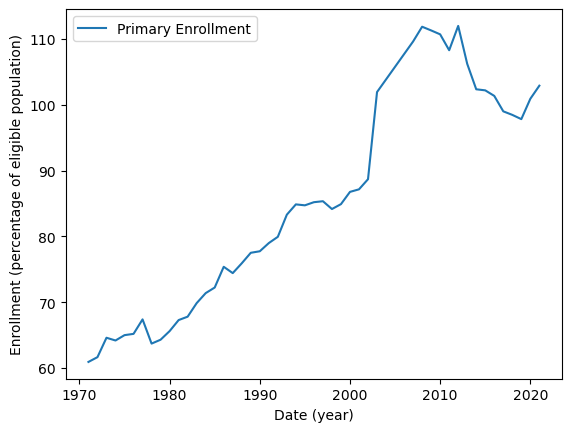

In [3]:
vars = {"SE.PRM.ENRR.FE":"Female Primary School Enrollment"}


se_pr = wbdata.get_dataframe(vars,country='IND')
se_pr = se_pr.reset_index()
se_pr['date'] = se_pr['date'].astype(int)
se_pr = se_pr.dropna()
print(se_pr)

plt.plot('date', 'Female Primary School Enrollment', data=se_pr, label='Primary Enrollment')
plt.xlabel('Date (year)')
plt.ylabel('Enrollment (percentage of eligible population)')
plt.legend()
#plt.legend(['Female Primary School Enrollment'])

    date  Female Secondary School Enrollment
0   2021                           76.714157
1   2020                           75.281502
2   2019                           74.522957
3   2018                           74.433037
4   2017                           74.058510
5   2016                           76.038948
6   2015                           74.685295
7   2014                           75.039261
8   2013                           69.481766
9   2012                           67.636864
10  2011                           64.669250
11  2010                           61.104801
12  2009                           57.518570
13  2008                           57.011890
14  2007                           53.305969
15  2006                           50.238201
16  2005                           49.015770
17  2004                           46.133671
18  2003                           44.495480
19  2002                           40.279751
20  2001                           37.776470
21  2000  

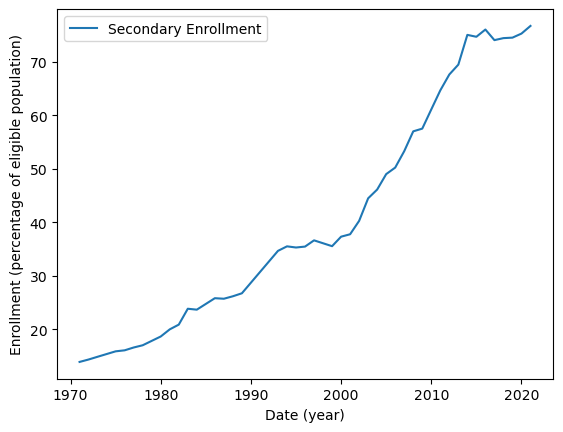

In [4]:
vars = {"SE.SEC.ENRR.FE":"Female Secondary School Enrollment"}


se_sec = wbdata.get_dataframe(vars,country='IND')
se_sec = se_sec.reset_index()
se_sec['date'] = se_sec['date'].astype(int)
se_sec = se_sec.dropna()
print(se_sec)

plt.plot('date', 'Female Secondary School Enrollment', data=se_sec, label='Secondary Enrollment')
plt.xlabel('Date (year)')
plt.ylabel('Enrollment (percentage of eligible population)')
plt.legend()
#plt.legend(['Female Secondary School Enrollment'])

    date  Female Tertiary School Enrollment
0   2021                          32.570179
1   2020                          31.293936
2   2019                          30.217958
3   2018                          29.061646
4   2017                          28.038717
5   2016                          27.043518
6   2015                          26.818808
7   2014                          25.398355
8   2013                          23.163738
10  2011                          20.094175
11  2010                          15.057737
12  2009                          13.286580
14  2007                          10.811700
15  2006                           9.646220
16  2005                           8.852190
17  2004                           8.776260
18  2003                           8.575290
19  2002                           8.341670
20  2001                           7.845380
21  2000                           7.508550
24  1997                           4.949440
25  1996                        

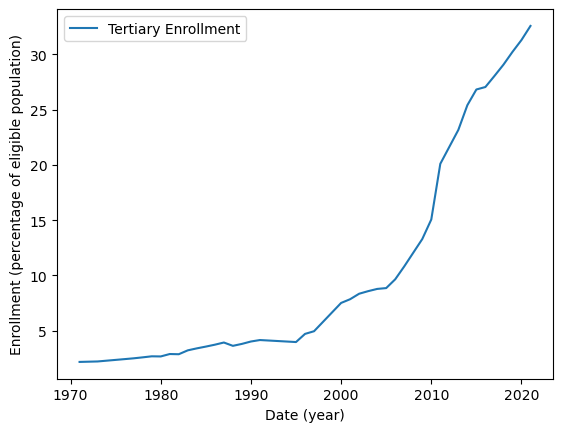

In [5]:
vars = {"SE.TER.ENRR.FE":"Female Tertiary School Enrollment"}


se_ter = wbdata.get_dataframe(vars,country='IND')
se_ter = se_ter.reset_index()
se_ter['date'] = se_ter['date'].astype(int)
se_ter = se_ter.dropna()
print(se_ter)

plt.plot('date', 'Female Tertiary School Enrollment', data=se_ter, label='Tertiary Enrollment')
plt.xlabel('Date (year)')
plt.ylabel('Enrollment (percentage of eligible population)')
plt.legend()
#plt.legend(['Female Tertiary School Enrollment'])

    date  Livestock index  Food index  Crop index    Population
0   2021              NaN         NaN         NaN  1.407564e+09
1   2020           116.45      116.38      115.29  1.396387e+09
2   2019           119.43      115.29      112.91  1.383112e+09
3   2018           118.09      115.01      111.82  1.369003e+09
4   2017           111.11      108.96      107.48  1.354196e+09
..   ...              ...         ...         ...           ...
57  1964            16.61       23.86       26.61  4.890593e+08
58  1963            16.64       23.31       25.94  4.779336e+08
59  1962            16.59       22.80       25.20  4.670242e+08
60  1961            16.49       23.13       25.46  4.563519e+08
61  1960              NaN         NaN         NaN  4.459546e+08

[62 rows x 5 columns]


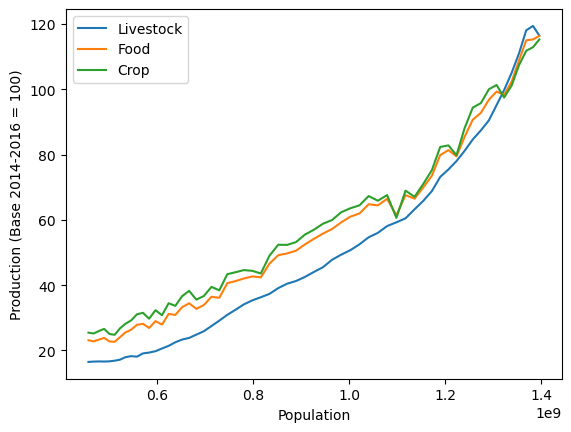

In [6]:
#wbdata.get_indicator()
"""
Agriculture Production Indices:

AG.PRD.AGRI.XD                                     Agriculture production index (1999-2001 = 100)
AG.PRD.BLY.MT                                      Barley production (metric tons)
AG.PRD.CREL.MT                                     Cereal production (metric tons)
AG.PRD.CREL.XD                                     Cereal production index (1999-2001 = 100)
AG.PRD.CROP.XD                                     Crop production index (2014-2016 = 100)
AG.PRD.FNO.MT                                      Fonio production (metric tons)
AG.PRD.FOOD.XD                                     Food production index (2014-2016 = 100)
AG.PRD.GAGRI.XD                                    Agriculture production index (gross, 1999-2001 = 100)
AG.PRD.GCREL.XD                                    Cereal production index (gross, 1999-2001 = 100)
AG.PRD.GCROP.XD                                    Crop production index (gross, 1999-2001 = 100)
AG.PRD.GFOOD.XD                                    Food production index (gross, 1999-2001 = 100)
AG.PRD.GLVSK.XD                                    Livestock production index (gross, 1999-2001 = 100)
AG.PRD.GNFOOD.XD                                   Non-food production index (gross, 1999-2001 = 100)
AG.PRD.LVSK.XD                                     Livestock production index (2014-2016 = 100)
AG.PRD.MLT.MT                                      Millet production (metric tons)
AG.PRD.MZE.MT                                      Maize production (metric tons)
AG.PRD.NFOOD.XD                                    Gross non-food production index (1999-2001 = 100)
AG.PRD.RICE.MT                                     Rice production (metric tons)
AG.PRD.RTTB.MT                                     Roots and tubers production (metric tons)
AG.PRD.SGM.MT                                      Sorghum production (metric tons)
AG.PRD.WHT.MT                                      Wheat production (metric tons)
"""

vars = {"AG.PRD.LVSK.XD":"Livestock index",
        "AG.PRD.FOOD.XD":"Food index",
        "AG.PRD.CROP.XD":"Crop index",
        "SP.POP.TOTL":"Population"}


ag = wbdata.get_dataframe(vars,country='IND')
ag = ag.reset_index()
ag['date'] = ag['date'].astype(int)
print(ag)

lvsk = plt.plot('Population', 'Livestock index', data=ag, label='Livestock')
food = plt.plot('Population', 'Food index', data=ag, label='Food')
crop = plt.plot('Population', 'Crop index', data=ag, label='Crop')
plt.xlabel('Population')
plt.ylabel('Production (Base 2014-2016 = 100)')
plt.legend()
#plt.legend(['Livestock index', 'Food index', 'Crop index'])

In [17]:
#plt.plot(ag['date'], np.log(ag['Population']))
#plt.plot(ag['date'], ag['Food index'])
ag_idx = ag.set_index(ag['date']).drop(columns=['date'])
ag_asc = ag_idx.sort_index()
ratesag = np.log(ag_asc).diff().dropna()
#ratesag
px.scatter(ratesag, x=ratesag.index, y=['Population', 'Food index'], trendline='ols')#, data=pop_growth_rate)
#px.scatter(ratesag, x=rates.index, y='Food index', trendline='ols')#, data=pop_growth_rate)

Text(0, 0.5, 'Food Production (log)')

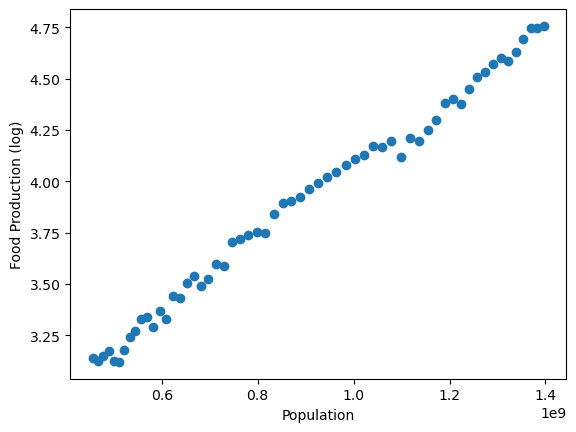

In [8]:
ag_idx = ag.set_index(ag['date']).drop(columns=['date'])
ag_idx['Food index (log)'] = np.log(ag_idx['Food index'])
#ag_idx_log = np.log(ag_idx).dropna()
plt.scatter('Population', 'Food index (log)', data=ag_idx)
plt.xlabel('Population')
plt.ylabel('Food Production (log)')

Text(0, 0.5, 'Food Production (log)')

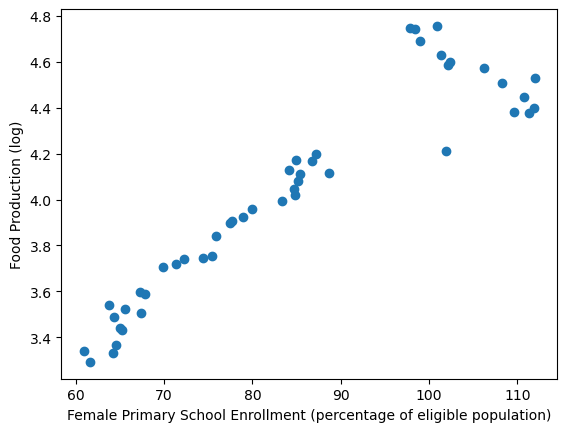

In [9]:
#plt.plot(se_pr['date'], np.log(se_pr['Female Primary School Enrollment']))
#plt.plot(se_pr['date'], se_pr['Food index'])
se_pr_idx = se_pr.set_index(se_pr['date']).drop(columns=['date'])
se_pr_asc = se_pr_idx.sort_index()
ag_fdix = ag_idx
se_pr_ag_merge = pandas.merge(ag_fdix, se_pr_idx, on= "date")
#se_pr_idx_log = np.log(se_pr_idx).dropna()
plt.scatter('Female Primary School Enrollment', 'Food index (log)', data=se_pr_ag_merge)
plt.xlabel('Female Primary School Enrollment (percentage of eligible population)')
plt.ylabel('Food Production (log)')

Text(0, 0.5, 'Population')

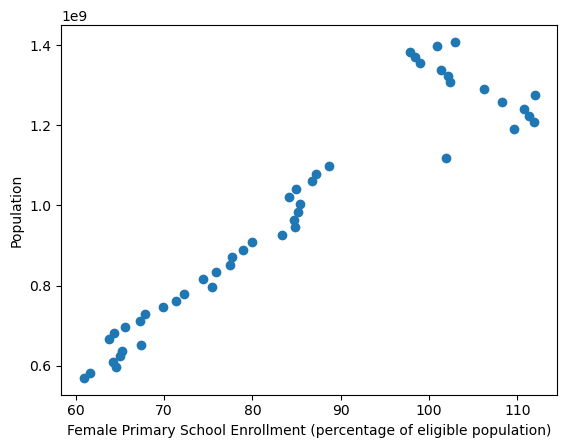

In [10]:
plt.scatter('Female Primary School Enrollment', 'Population', data=se_pr_ag_merge)
plt.xlabel('Female Primary School Enrollment (percentage of eligible population)')
plt.ylabel('Population')

Text(0, 0.5, 'Food Production (log)')

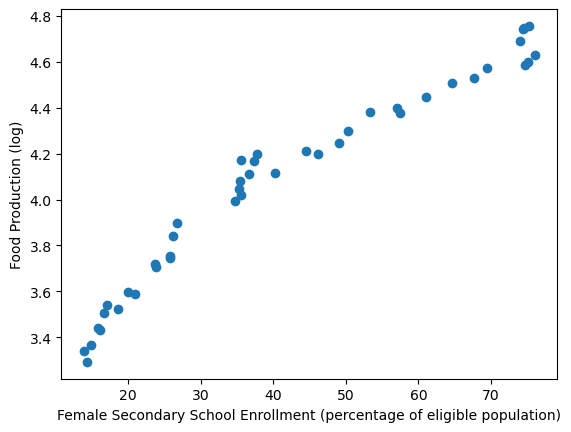

In [11]:
#plt.plot(se_sec['date'], np.log(se_sec['Female Secondary School Enrollment']))
#plt.plot(se_sec['date'], se_sec['Food index'])
se_sec_idx = se_sec.set_index(se_sec['date']).drop(columns=['date'])
se_sec_asc = se_sec_idx.sort_index()
ag_fdix = ag_idx
se_sec_ag_merge = pandas.merge(ag_fdix, se_sec_idx, on= "date")
#se_sec_idx_log = np.log(se_sec_idx).dropna()
plt.scatter('Female Secondary School Enrollment', 'Food index (log)', data=se_sec_ag_merge)
plt.xlabel('Female Secondary School Enrollment (percentage of eligible population)')
plt.ylabel('Food Production (log)')


Text(0, 0.5, 'Population')

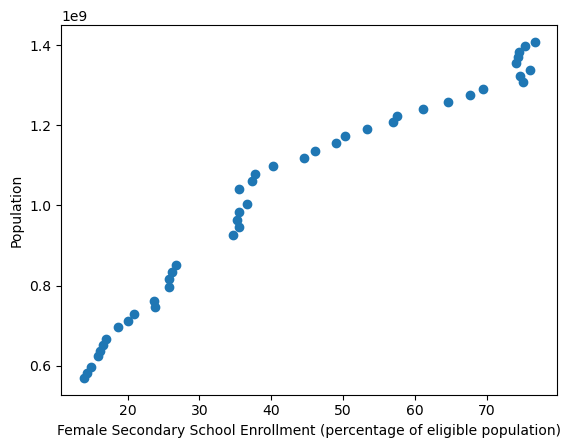

In [12]:
plt.scatter('Female Secondary School Enrollment', 'Population', data=se_sec_ag_merge)
plt.xlabel('Female Secondary School Enrollment (percentage of eligible population)')
plt.ylabel('Population')

Text(0, 0.5, 'Food Production (log)')

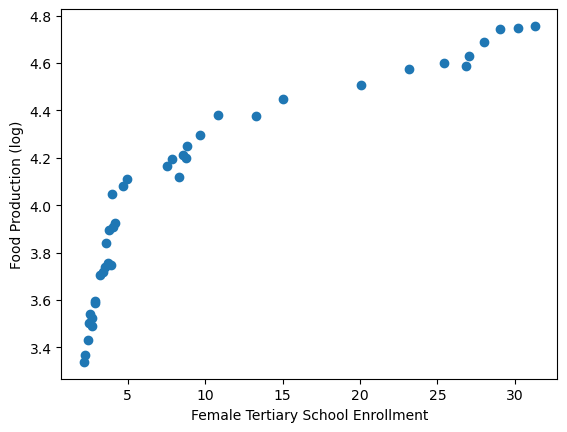

In [13]:
#plt.plot(se_ter['date'], np.log(se_ter['Female Tertiary School Enrollment']))
#plt.plot(se_ter['date'], se_ter['Food index'])
se_ter_idx = se_ter.set_index(se_ter['date']).drop(columns=['date'])
se_ter_asc = se_ter_idx.sort_index()
ag_fdix = ag_idx
se_ter_ag_merge = pandas.merge(ag_fdix, se_ter_idx, on= "date")
#se_ter_idx_log = np.log(se_ter_idx).dropna()
plt.scatter('Female Tertiary School Enrollment', 'Food index (log)', data=se_ter_ag_merge)
plt.xlabel('Female Tertiary School Enrollment')
plt.ylabel('Food Production (log)')

Text(0, 0.5, 'Population')

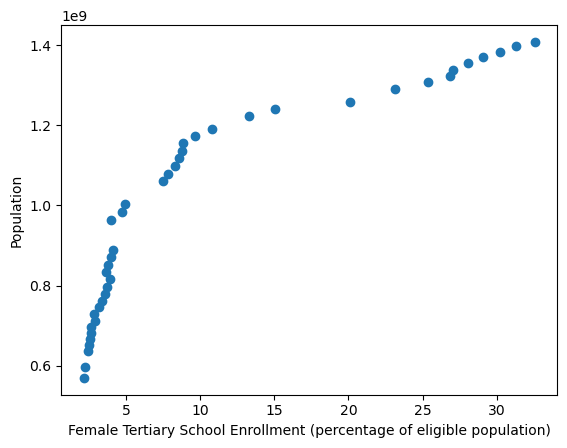

In [14]:
plt.scatter('Female Tertiary School Enrollment', 'Population', data=se_ter_ag_merge)
plt.xlabel('Female Tertiary School Enrollment (percentage of eligible population)')
plt.ylabel('Population')

    date  Female Primary School Enrollment  \
0   2021                        102.895470   
1   2020                        100.908241   
2   2019                         97.814339   
3   2018                         98.460716   
4   2017                         98.997818   
5   2016                        101.343559   
6   2015                        102.185699   
7   2014                        102.349518   
8   2013                        106.215302   
10  2011                        108.281708   
11  2010                        110.695122   
12  2009                        111.289284   
14  2007                        109.611580   
18  2003                        101.926666   
19  2002                         88.688507   
20  2001                         87.150177   
21  2000                         86.762337   
24  1997                         85.343582   
25  1996                         85.195610   
26  1995                         84.719910   
32  1989                         7

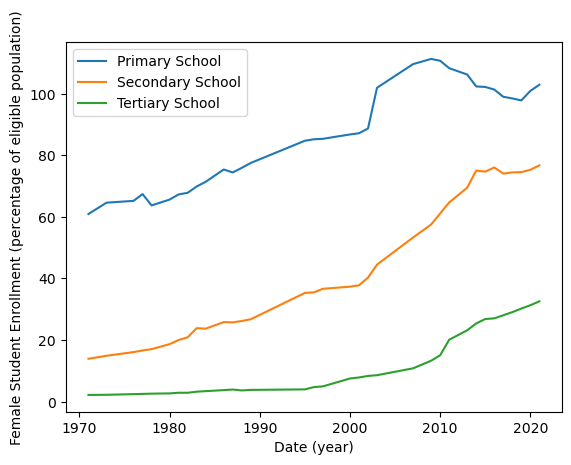

In [15]:
#wbdata.get_indicator()
"""
School Enrollment Indices:

SE.PRM.ENRR.FE                        Female Primary School Enrollment
SE.SEC.ENRR.FE                        Female Secondary School Enrollment
SE.TER.ENRR.FE                        Female Tertiary School Enrollment
"""

vars = {"SE.PRM.ENRR.FE":"Female Primary School Enrollment",
        "SE.SEC.ENRR.FE":"Female Secondary School Enrollment",
        "SE.TER.ENRR.FE":"Female Tertiary School Enrollment"}


se_com = wbdata.get_dataframe(vars,country='IND')
se_com = se_com.reset_index()
se_com['date'] = se_com['date'].astype(int)
se_com = se_com.dropna()
print(se_com)

se_com_pr = plt.plot('date', 'Female Primary School Enrollment', data=se_com, label='Primary School')
se_com_sec = plt.plot('date', 'Female Secondary School Enrollment', data=se_com, label='Secondary School')
se_com_ter = plt.plot('date', 'Female Tertiary School Enrollment', data=se_com, label='Tertiary School')
plt.xlabel('Date (year)')
plt.ylabel('Female Student Enrollment (percentage of eligible population)')
plt.legend()
#plt.legend(['Primary Enrollment', 'Secondary Enrollment', 'Tertiary Enrollment'])

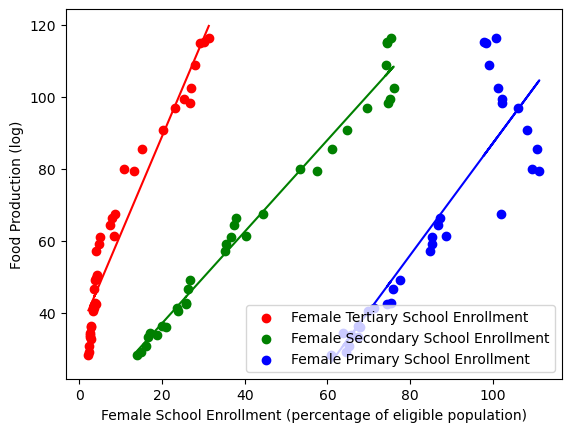

In [58]:
import numpy as np
import matplotlib.pyplot as plt

merged_se_prsecter = se_pr_ag_merge.merge(se_sec_ag_merge, on='date', how='left').merge(se_ter_ag_merge, on='date', how='left')

merged_se_prsecter.dropna(inplace=True, subset=['Female Tertiary School Enrollment', 'Food index'], how='any')
x = merged_se_prsecter['Female Tertiary School Enrollment']
y = merged_se_prsecter['Food index']
coeffs = np.polyfit(x, y, 1)
polynomial = np.poly1d(coeffs)
plt.scatter('Female Tertiary School Enrollment', 'Food index', data=merged_se_prsecter, label='Female Tertiary School Enrollment', color='red')
plt.plot(x, polynomial(x), 'r-')

merged_se_prsecter.dropna(inplace=True, subset=['Female Secondary School Enrollment', 'Food index'], how='any')
x = merged_se_prsecter['Female Secondary School Enrollment']
y = merged_se_prsecter['Food index']
coeffs = np.polyfit(x, y, 1)
polynomial = np.poly1d(coeffs)
plt.scatter('Female Secondary School Enrollment', 'Food index', data=merged_se_prsecter, label='Female Secondary School Enrollment', color='green')
plt.plot(x, polynomial(x), 'g-')

merged_se_prsecter.dropna(inplace=True, subset=['Female Primary School Enrollment', 'Food index'], how='any')
x = merged_se_prsecter['Female Primary School Enrollment']
y = merged_se_prsecter['Food index']
coeffs = np.polyfit(x, y, 1)
polynomial = np.poly1d(coeffs)
plt.scatter('Female Primary School Enrollment', 'Food index', data=merged_se_prsecter, label='Female Primary School Enrollment', color='blue')
plt.plot(x, polynomial(x), 'b-')

plt.xlabel('Female School Enrollment (percentage of eligible population)')
plt.ylabel('Food Production (log)')
plt.legend(loc='lower right')
plt.show()
